# NASA ASTROID CLASSIFICATION PROJECT

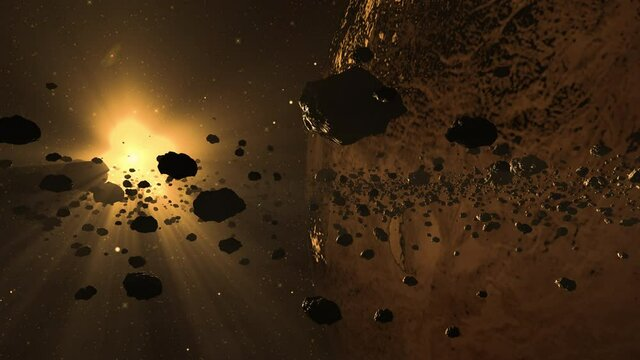

In [55]:
import pyforest
import plotly
import cufflinks as cf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


In [2]:
df = pd.read_csv('nasa.csv')
df

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  Orbit Uncertainity  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion Equinox  Hazardous
0              3703080  3703080              21.600            0.127220            0.284472         127.219879         284.472297               0.079051               0.176763            417.388066            933.308089          1995-01-01               788947200000                      6.115834                 22017.003799    13680.509944                  0.419483         163.178711            6.275369e+07       3.899334e+07         Earth        17      2017-04-06 08:36:37                   5                    0.025282                        4.634         2458000.5      0.425549         1.407011     6.025981          314.373913      609.599786             0.808259       57.257470       2.005764     2.458162e+06    264.837533     0.590551   J2000       True
1              3723955  3723955              21.300            0.146068            0.326618         146.067964         326.617897               0.090762               0.202951            479.225620           1071.581063          1995-01-01               788947200000                     18.113985                 65210.346095    40519.173105                  0.383014         148.992630            5.729815e+07       3.560342e+07         Earth        21      2017-04-06 08:32:49                   3                    0.186935                        5.457         2458000.5      0.351674         1.107776    28.412996          136.717242      425.869294             0.718200      313.091975       1.497352     2.457795e+06    173.741112     0.845330   J2000      False
2              2446862  2446862              20.300            0.231502            0.517654         231.502122         517.654482               0.143849               0.321655            759.521423           1698.341531          1995-01-08               789552000000                      7.590711                 27326.560182    16979.661798                  0.050956          19.821890            7.622912e+06       4.736658e+06         Earth        22      2017-04-06 09:20:19                   0                    0.043058                        4.557         2458000.5      0.348248         1.458824     4.237961          259.475979      643.580228             0.950791      248.415038       1.966857     2.458120e+06    292.893654     0.559371   J2000       True
3              3092506  3092506              27.400            0.008801            0.019681           8.801465          19.680675               0.005469               0.012229             28.876199             64.569144          1995-01-15               790156800000                     11.173874                 40225.948191    24994.839864                  0.285322         110.990387            4.268362e+07       2.652237e+07         Earth         7      2017-04-06 09:15:49                   6                    0.005512                        5.093         2458000.5      0.216578         1.255903     7.905894           57.173266      514.082140             0.983902       18.707701       1.527904     2.457902e+06     68.741007     0.700277   J2000      False
4              3514799  3514799              21.600            0.127220            0.284472         127.219879         284.472297               0.079051         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [4]:
df.describe().T

count          mean           std           min           25%           50%           75%           max
Neo Reference ID              4687.0  3.272298e+06  5.486011e+05  2.000433e+06  3.097594e+06  3.514799e+06  3.690060e+06  3.781897e+06
Name                          4687.0  3.272298e+06  5.486011e+05  2.000433e+06  3.097594e+06  3.514799e+06  3.690060e+06  3.781897e+06
Absolute Magnitude            4687.0  2.226786e+01  2.890972e+00  1.116000e+01  2.010000e+01  2.190000e+01  2.450000e+01  3.210000e+01
Est Dia in KM(min)            4687.0  2.046042e-01  3.695734e-01  1.010543e-03  3.346224e-02  1.108039e-01  2.538370e-01  1.557955e+01
Est Dia in KM(max)            4687.0  4.575089e-01  8.263912e-01  2.259644e-03  7.482384e-02  2.477650e-01  5.675969e-01  3.483694e+01
Est Dia in M(min)             4687.0  2.046042e+02  3.695734e+02  1.010543e+00  3.346224e+01  1.108039e+02  2.538370e+02  1.557955e+04
Est Dia in M(max)             4687.0  4.575089e+02  8.263912e+02  2.259644e+00  7.482384e+01  2.477650e+02  5.675969e+02  3.483694e+04
Est Dia in Miles(min)         4687.0  1.271351e-01  2.296422e-01  6.279224e-04  2.079246e-02  6.885032e-02  1.577270e-01  9.680682e+00
Est Dia in Miles(max)         4687.0  2.842828e-01  5.134956e-01  1.404077e-03  4.649336e-02  1.539540e-01  3.526882e-01  2.164666e+01
Est Dia in Feet(min)          4687.0  6.712737e+02  1.212511e+03  3.315431e+00  1.097842e+02  3.635298e+02  8.327987e+02  5.111402e+04
Est Dia in Feet(max)          4687.0  1.501014e+03  2.711257e+03  7.413530e+00  2.454850e+02  8.128774e+02  1.862194e+03  1.142944e+05
Epoch Date Close Approach     4687.0  1.179881e+12  1.981540e+11  7.889472e+11  1.015574e+12  1.203062e+12  1.355558e+12  1.473318e+12
Relative Velocity km per sec  4687.0  1.397081e+01  7.293223e+00  3.355041e-01  8.432865e+00  1.291789e+01  1.807765e+01  4.463375e+01
Relative Velocity km per hr   4687.0  5.029492e+04  2.625560e+04  1.207815e+03  3.035831e+04  4.650440e+04  6.507954e+04  1.606815e+05
Miles per hour                4687.0  3.125131e+04  1.631421e+04  7.504891e+02  1.886348e+04  2.889603e+04  4.043789e+04  9.984123e+04
Miss Dist.(Astronomical)      4687.0  2.567782e-01  1.457982e-01  1.778761e-04  1.334196e-01  2.650286e-01  3.841541e-01  4.998841e-01
Miss Dist.(lunar)             4687.0  9.988671e+01  5.671549e+01  6.919380e-02  5.190021e+01  1.030961e+02  1.494359e+02  1.944549e+02
Miss Dist.(kilometers)        4687.0  3.841347e+07  2.181110e+07  2.660989e+04  1.995928e+07  3.964771e+07  5.746863e+07  7.478160e+07
Miss Dist.(miles)             4687.0  2.386902e+07  1.355279e+07  1.653462e+04  1.240212e+07  2.463595e+07  3.570935e+07  4.646713e+07
Orbit ID                      4687.0  2.830062e+01  3.829967e+01  1.000000e+00  9.000000e+00  1.600000e+01  3.100000e+01  6.110000e+02
Orbit Uncertainity            4687.0  3.516962e+00  3.078307e+00  0.000000e+00  0.000000e+00  3.000000e+00  6.000000e+00  9.000000e+00
Minimum Orbit Intersection    4687.0  8.232007e-02  9.029997e-02  2.061110e-06  1.458510e-02  4.736550e-02  1.235935e-01  4.778910e-01
Jupiter Tisserand Invariant   4687.0  5.056111e+00  1.237818e+00  2.196000e+00  4.049500e+00  5.071000e+00  6.019000e+00  9.025000e+00
Epoch Osculation              4687.0  2.457724e+06  9.202975e+02  2.450164e+06  2.458000e+06  2.458000e+06  2.458000e+06  2.458020e+06
Eccentricity                  4687.0  3.825691e-01  1.804438e-01  7.522355e-03  2.408583e-01  3.724502e-01  5.124106e-01  9.602607e-01
Semi Major Axis               4687.0  1.400264e+00  5.241539e-01  6.159204e-01  1.000635e+00  1.240981e+00  1.678364e+00  5.072008e+00
Inclination                   4687.0  1.337384e+01  1.093623e+01  1.451294e-02  4.962341e+00  1.031184e+01  1.951168e+01  7.540667e+01
Asc Node Longitude            4687.0  1.721573e+02  1.032768e+02  1.940674e-03  8.308121e+01  1.726254e+02  2.550269e+02  3.599059e+02
Orbital Period                4687.0  6.355821e+02  3.709547e+02  1.765572e+02  3.656050e+02  5.049473e+02  7.941960

False    3932
True      755
Name: Hazardous, dtype: int64


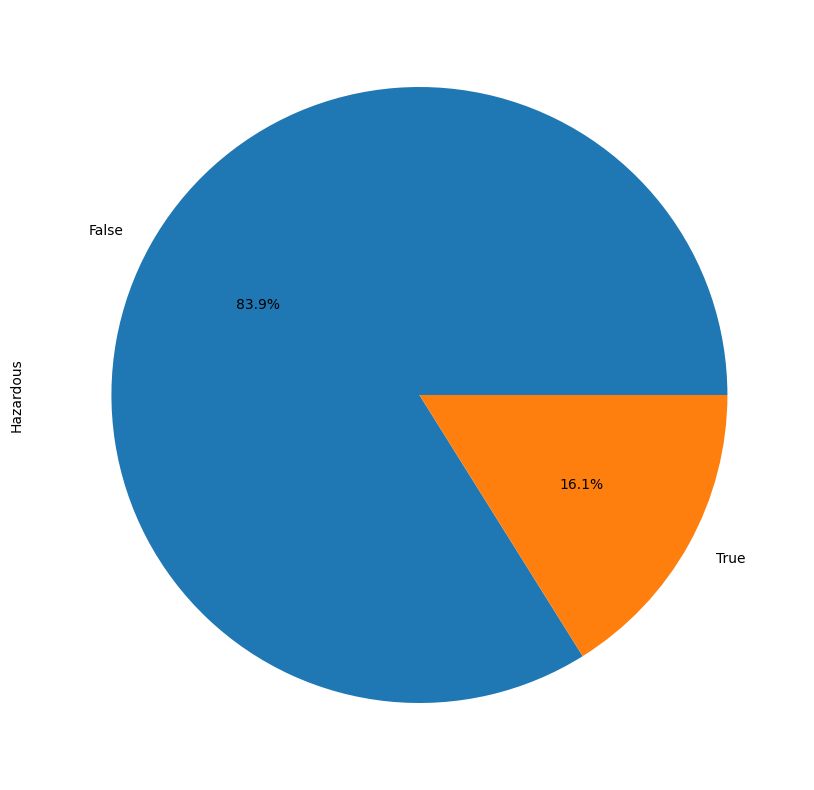

In [5]:
print(df["Hazardous"].value_counts())
df["Hazardous"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

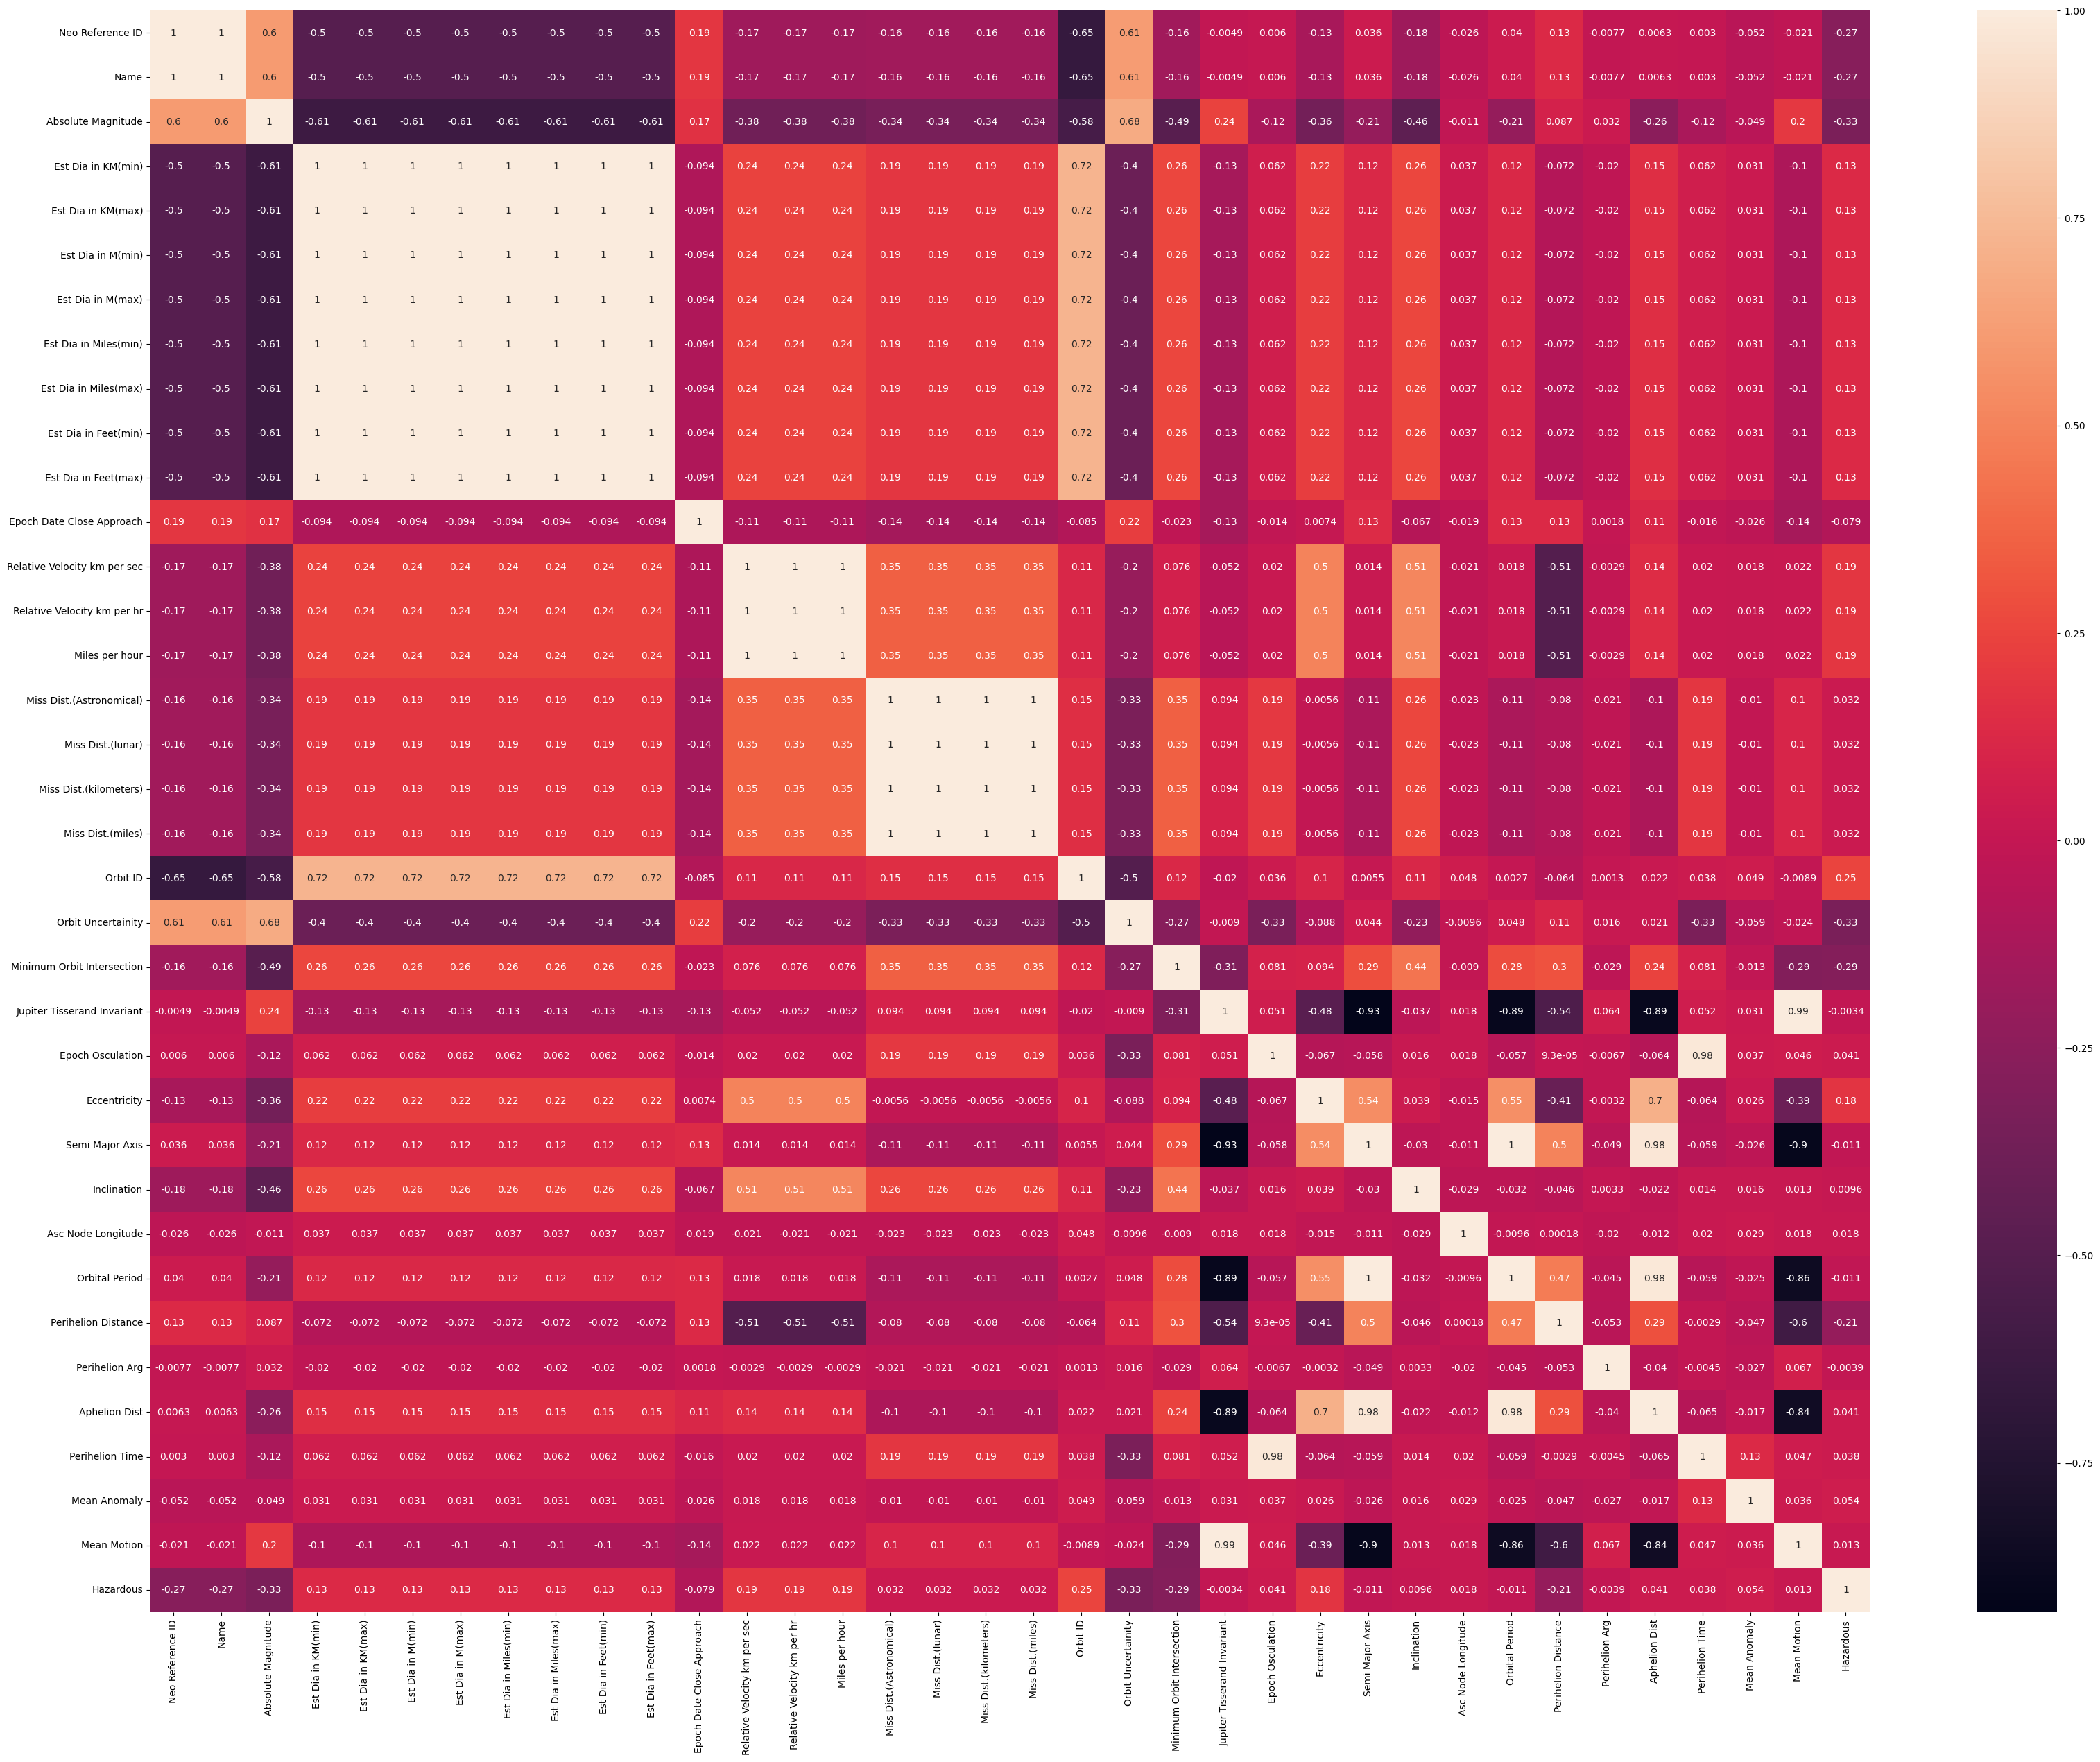

In [6]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True);

In [7]:
df_temp = df.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")

In [8]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

feature                     collinear
0             Est Dia in KM(min)             Est Dia in M(max)
1             Est Dia in KM(max)             Est Dia in M(min)
2             Est Dia in KM(max)          Est Dia in Feet(max)
3              Est Dia in M(min)            Est Dia in KM(max)
4              Est Dia in M(min)         Est Dia in Miles(min)
5              Est Dia in M(min)         Est Dia in Miles(max)
6              Est Dia in M(min)          Est Dia in Feet(max)
7              Est Dia in M(max)            Est Dia in KM(min)
8              Est Dia in M(max)         Est Dia in Miles(max)
9              Est Dia in M(max)          Est Dia in Feet(max)
10         Est Dia in Miles(min)             Est Dia in M(min)
11         Est Dia in Miles(min)         Est Dia in Miles(max)
12         Est Dia in Miles(min)          Est Dia in Feet(max)
13         Est Dia in Miles(max)             Est Dia in M(min)
14         Est Dia in Miles(max)             Est Dia in M(max)
15         Est Dia in Miles(max)         Est Dia in Miles(min)
16          Est Dia in Feet(max)            Est Dia in KM(max)
17          Est Dia in Feet(max)             Est Dia in M(min)
18          Est Dia in Feet(max)             Est Dia in M(max)
19          Est Dia in Feet(max)         Est Dia in Miles(min)
20  Relative Velocity km per sec   Relative Velocity km per hr
21   Relative Velocity km per hr  Relative Velocity km per sec
22      Miss Dist.(Astronomical)             Miss Dist.(lunar)
23      Miss Dist.(Astronomical)        Miss Dist.(kilometers)
24      Miss Dist.(Astronomical)             Miss Dist.(miles)
25             Miss Dist.(lunar)      Miss Dist.(Astronomical)
26             Miss Dist.(lunar)        Miss Dist.(kilometers)
27             Miss Dist.(lunar)             Miss Dist.(miles)
28        Miss Dist.(kilometers)      Miss Dist.(Astronomical)
29        Miss Dist.(kilometers)             Miss Dist.(lunar)
30        Miss Dist.(kilometers)             Miss Dist.(miles)
31             Miss Dist.(miles)      Miss Dist.(Astronomical)
32             Miss Dist.(miles)             Miss Dist.(lunar)
33             Miss Dist.(miles)        Miss Dist.(kilometers)
34   Jupiter Tisserand Invariant               Semi Major Axis
35   Jupiter Tisserand Invariant                   Mean Motion
36              Epoch Osculation               Perihelion Time
37               Semi Major Axis   Jupiter Tisserand Invariant
38               Semi Major Axis                Orbital Period
39               Semi Major Axis                 Aphelion Dist
40               Semi Major Axis                   Mean Motion
41                Orbital Period               Semi Major Axis
42                Orbital Period                 Aphelion Dist
43                 Aphelion Dist               Semi Major Axis
44                 Aphelion Dist                Orbital Period
45               Perihelion Time              Epoch Osculation
46                   Mean Motion   Jupiter Tisserand Invariant
47                   Mean Motion               Semi Major Axis

In [9]:
drop_list1 = [
    "Est Dia in KM(min)", "Est Dia in KM(max)", "Est Dia in Miles(min)", "Est Dia in Miles(max)", "Est Dia in Feet(max)","Est Dia in Feet(min)","Relative Velocity km per sec", "Miles per hour",
    "Miss Dist.(Astronomical)", "Miss Dist.(lunar)", "Miss Dist.(miles)","Semi Major Axis",  "Mean Motion", "Epoch Osculation", 
]

df.drop(drop_list1, axis=1, inplace=True)

In [10]:
df_temp = df.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")

In [11]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

feature       collinear
0  Orbital Period   Aphelion Dist
1   Aphelion Dist  Orbital Period

In [12]:
df

Neo Reference ID     Name  Absolute Magnitude  Est Dia in M(min)  Est Dia in M(max) Close Approach Date  Epoch Date Close Approach  Relative Velocity km per hr  Miss Dist.(kilometers) Orbiting Body  Orbit ID Orbit Determination Date  Orbit Uncertainity  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Eccentricity  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly Equinox  Hazardous
0              3703080  3703080              21.600         127.219879         284.472297          1995-01-01               788947200000                 22017.003799            6.275369e+07         Earth        17      2017-04-06 08:36:37                   5                    0.025282                        4.634      0.425549     6.025981          314.373913      609.599786             0.808259       57.257470       2.005764     2.458162e+06    264.837533   J2000       True
1              3723955  3723955              21.300         146.067964         326.617897          1995-01-01               788947200000                 65210.346095            5.729815e+07         Earth        21      2017-04-06 08:32:49                   3                    0.186935                        5.457      0.351674    28.412996          136.717242      425.869294             0.718200      313.091975       1.497352     2.457795e+06    173.741112   J2000      False
2              2446862  2446862              20.300         231.502122         517.654482          1995-01-08               789552000000                 27326.560182            7.622912e+06         Earth        22      2017-04-06 09:20:19                   0                    0.043058                        4.557      0.348248     4.237961          259.475979      643.580228             0.950791      248.415038       1.966857     2.458120e+06    292.893654   J2000       True
3              3092506  3092506              27.400           8.801465          19.680675          1995-01-15               790156800000                 40225.948191            4.268362e+07         Earth         7      2017-04-06 09:15:49                   6                    0.005512                        5.093      0.216578     7.905894           57.173266      514.082140             0.983902       18.707701       1.527904     2.457902e+06     68.741007   J2000      False
4              3514799  3514799              21.600         127.219879         284.472297          1995-01-15               790156800000                 35426.991794            6.101082e+07         Earth        25      2017-04-06 08:57:58                   1                    0.034798                        5.154      0.210448    16.793382           84.629307      495.597821             0.967687      158.263596       1.483543     2.457814e+06    135.142133   J2000       True
...                ...      ...                 ...                ...                ...                 ...                        ...                          ...                     ...           ...       ...                      ...                 ...                         ...                          ...           ...          ...                 ...             ...                  ...             ...            ...              ...           ...     ...        ...
4682           3759007  3759007              23.900          44.111820          98.637028          2016-09-08              1473318000000                 79755.354273            6.187511e+06         Earth         4      2017-04-06 08:24:07                   8                    0.019777                        5.156      0.361512    39.880491          164.183305      457.179984             0.741558      276.395697       1.581299     2.457708e+06    304.306025   J2000      False
4683           3759295  3759295              28.200           6.089126          13.615700          2016-09-08              1473318000000                 11610

In [13]:
drop_list1 = [
    "Aphelion Dist", "Neo Reference ID", "Name"   
]

df.drop(drop_list1, axis=1, inplace=True)

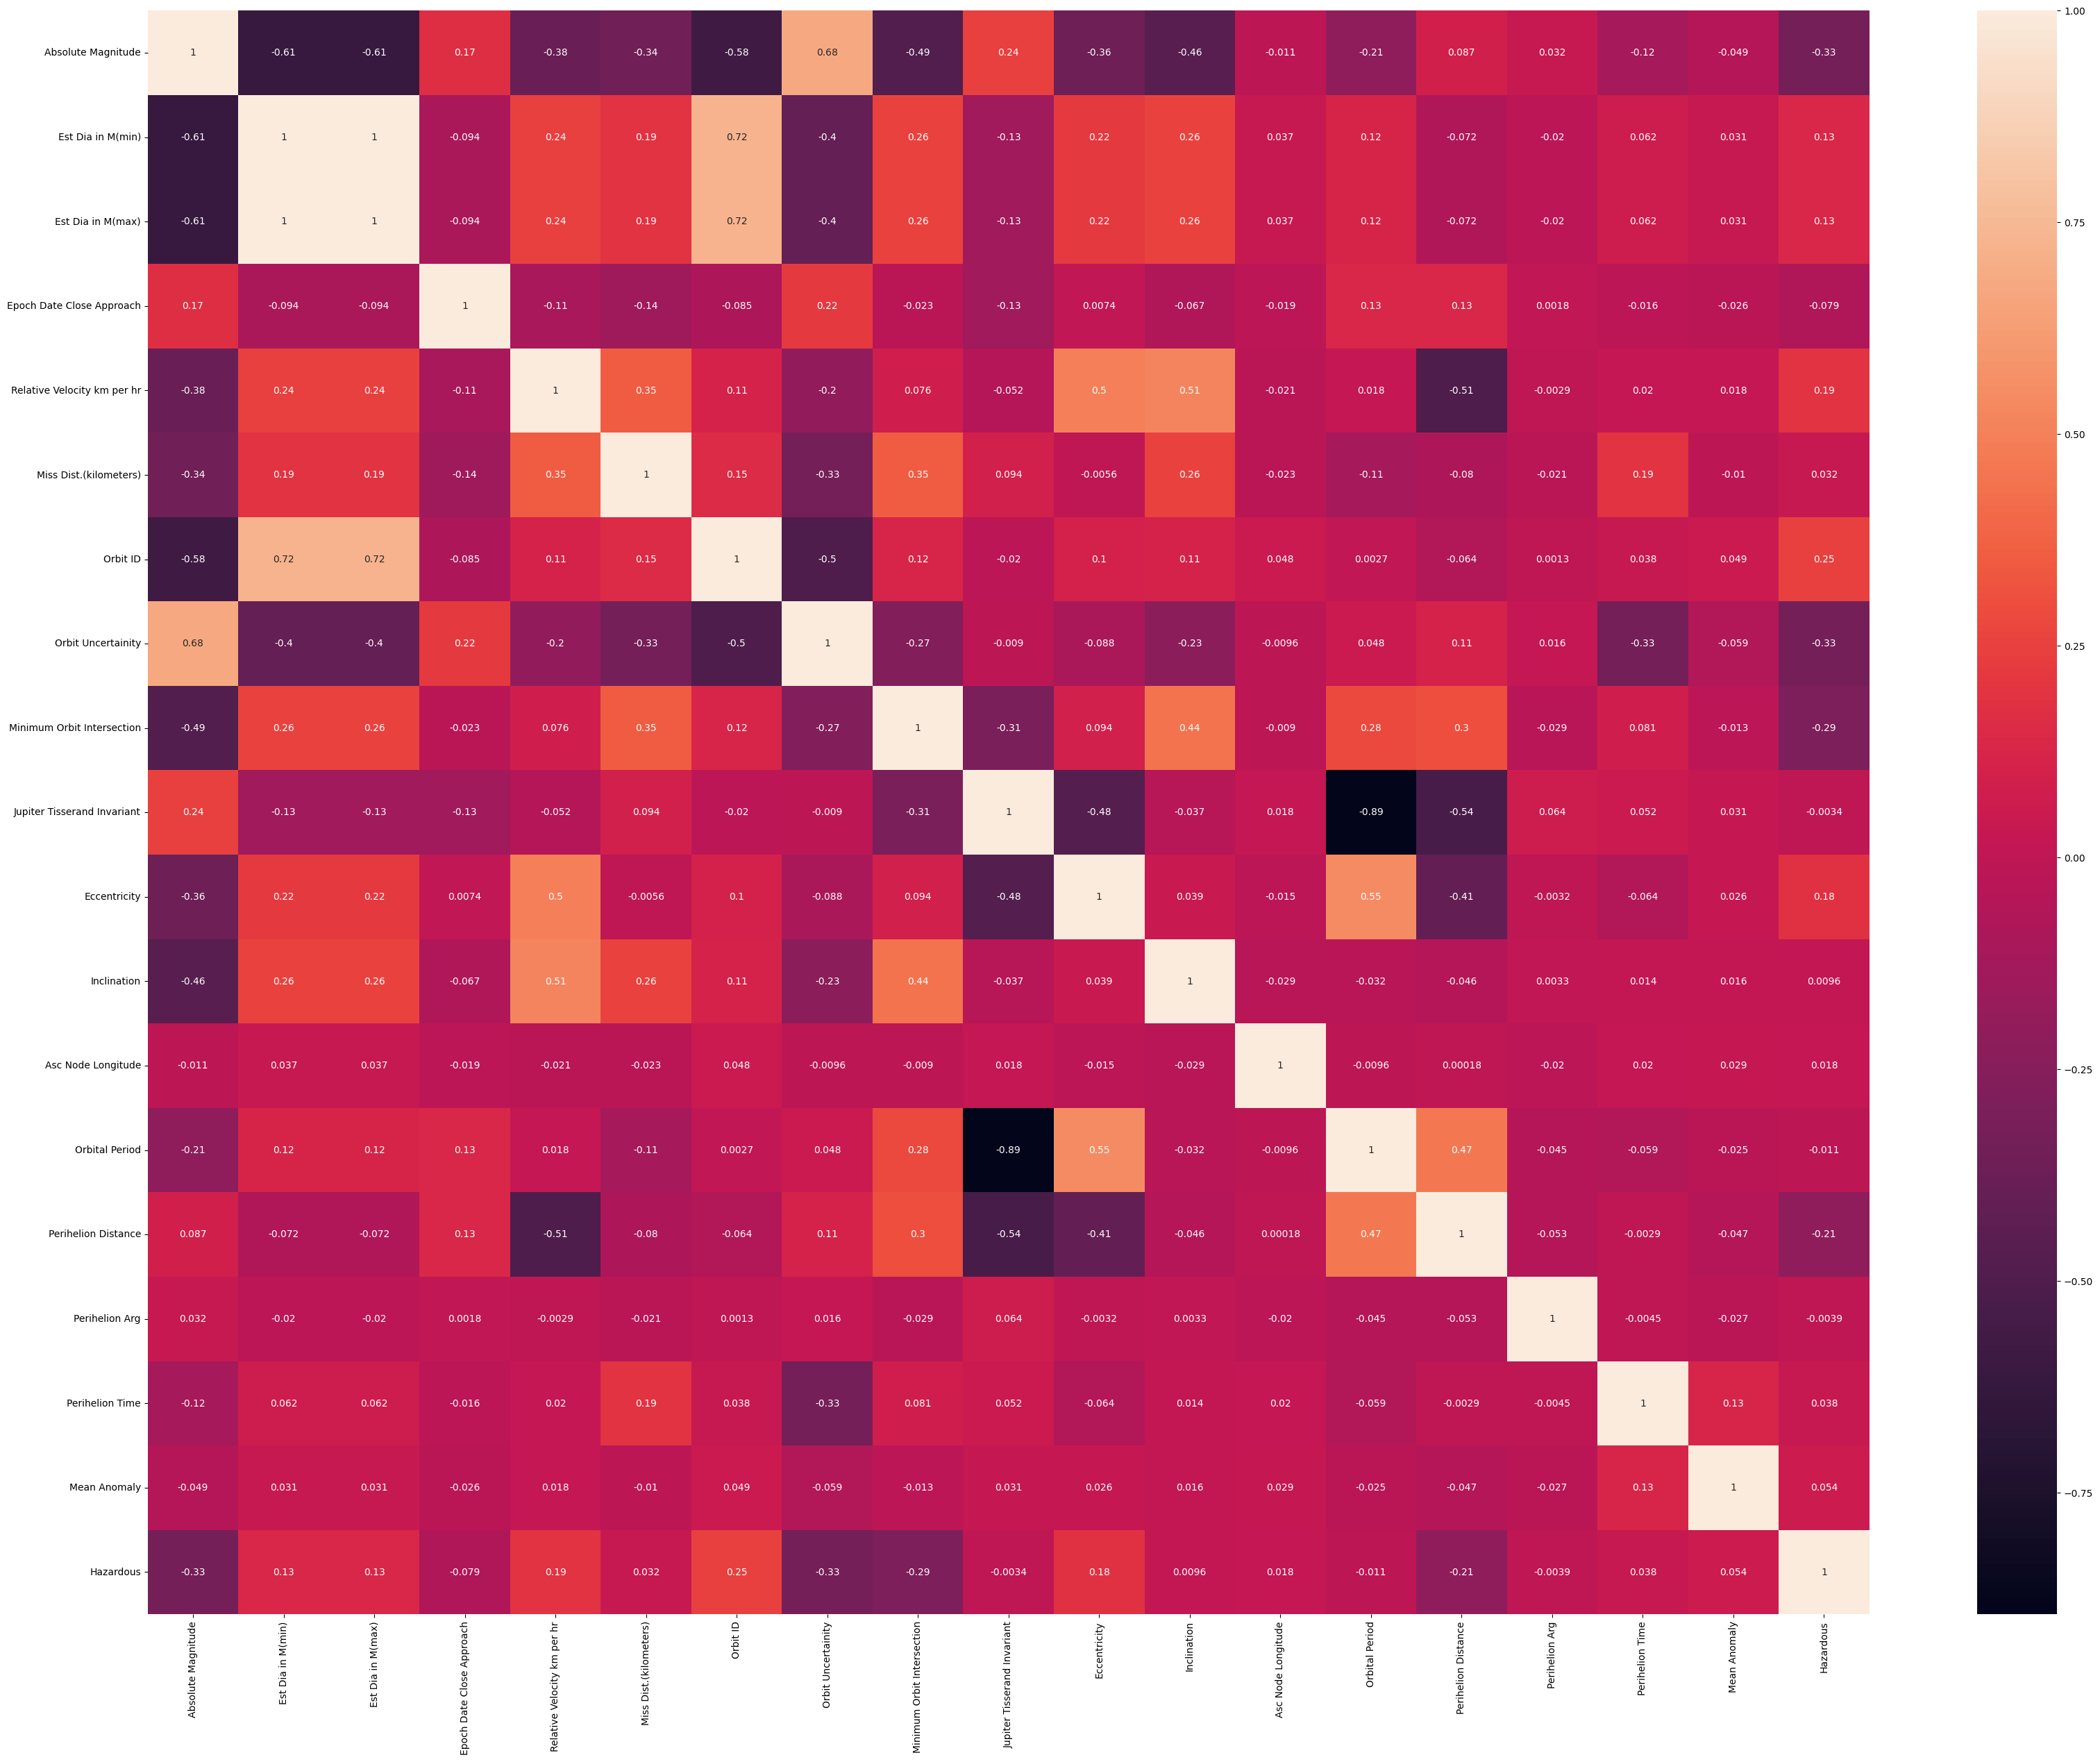

In [14]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True);

In [15]:
df

Absolute Magnitude  Est Dia in M(min)  Est Dia in M(max) Close Approach Date  Epoch Date Close Approach  Relative Velocity km per hr  Miss Dist.(kilometers) Orbiting Body  Orbit ID Orbit Determination Date  Orbit Uncertainity  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Eccentricity  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Perihelion Time  Mean Anomaly Equinox  Hazardous
0                 21.600         127.219879         284.472297          1995-01-01               788947200000                 22017.003799            6.275369e+07         Earth        17      2017-04-06 08:36:37                   5                    0.025282                        4.634      0.425549     6.025981          314.373913      609.599786             0.808259       57.257470     2.458162e+06    264.837533   J2000       True
1                 21.300         146.067964         326.617897          1995-01-01               788947200000                 65210.346095            5.729815e+07         Earth        21      2017-04-06 08:32:49                   3                    0.186935                        5.457      0.351674    28.412996          136.717242      425.869294             0.718200      313.091975     2.457795e+06    173.741112   J2000      False
2                 20.300         231.502122         517.654482          1995-01-08               789552000000                 27326.560182            7.622912e+06         Earth        22      2017-04-06 09:20:19                   0                    0.043058                        4.557      0.348248     4.237961          259.475979      643.580228             0.950791      248.415038     2.458120e+06    292.893654   J2000       True
3                 27.400           8.801465          19.680675          1995-01-15               790156800000                 40225.948191            4.268362e+07         Earth         7      2017-04-06 09:15:49                   6                    0.005512                        5.093      0.216578     7.905894           57.173266      514.082140             0.983902       18.707701     2.457902e+06     68.741007   J2000      False
4                 21.600         127.219879         284.472297          1995-01-15               790156800000                 35426.991794            6.101082e+07         Earth        25      2017-04-06 08:57:58                   1                    0.034798                        5.154      0.210448    16.793382           84.629307      495.597821             0.967687      158.263596     2.457814e+06    135.142133   J2000       True
...                  ...                ...                ...                 ...                        ...                          ...                     ...           ...       ...                      ...                 ...                         ...                          ...           ...          ...                 ...             ...                  ...             ...              ...           ...     ...        ...
4682              23.900          44.111820          98.637028          2016-09-08              1473318000000                 79755.354273            6.187511e+06         Earth         4      2017-04-06 08:24:07                   8                    0.019777                        5.156      0.361512    39.880491          164.183305      457.179984             0.741558      276.395697     2.457708e+06    304.306025   J2000      False
4683              28.200           6.089126          13.615700          2016-09-08              1473318000000                 11610.539577            9.677324e+05         Earth         2      2017-04-06 08:23:58                   6                    0.006451                        5.742      0.073200     5.360249          345.225230      407.185767             0.996434       42.111064     2.458088e+06    282.978786   J2000      False
4684              22.700          76.657557         171

In [16]:
df['Orbiting Body'].value_counts()

Earth    4687
Name: Orbiting Body, dtype: int64

In [17]:
df['Orbit Uncertainity'].value_counts()

0    1353
7     700
6     620
1     568
8     329
5     321
2     279
4     212
3     182
9     123
Name: Orbit Uncertainity, dtype: int64

In [18]:
df["Equinox"].value_counts()

J2000    4687
Name: Equinox, dtype: int64

In [19]:
drop_list1 = [
    "Orbiting Body", "Orbit ID", "Orbit Determination Date", "Close Approach Date", "Equinox"
]

df.drop(drop_list1, axis=1, inplace=True)

In [21]:
df

Absolute Magnitude  Est Dia in M(min)  Est Dia in M(max)  Epoch Date Close Approach  Relative Velocity km per hr  Miss Dist.(kilometers)  Orbit Uncertainity  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Eccentricity  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Perihelion Time  Mean Anomaly  Hazardous
0                 21.600         127.219879         284.472297               788947200000                 22017.003799            6.275369e+07                   5                    0.025282                        4.634      0.425549     6.025981          314.373913      609.599786             0.808259       57.257470     2.458162e+06    264.837533       True
1                 21.300         146.067964         326.617897               788947200000                 65210.346095            5.729815e+07                   3                    0.186935                        5.457      0.351674    28.412996          136.717242      425.869294             0.718200      313.091975     2.457795e+06    173.741112      False
2                 20.300         231.502122         517.654482               789552000000                 27326.560182            7.622912e+06                   0                    0.043058                        4.557      0.348248     4.237961          259.475979      643.580228             0.950791      248.415038     2.458120e+06    292.893654       True
3                 27.400           8.801465          19.680675               790156800000                 40225.948191            4.268362e+07                   6                    0.005512                        5.093      0.216578     7.905894           57.173266      514.082140             0.983902       18.707701     2.457902e+06     68.741007      False
4                 21.600         127.219879         284.472297               790156800000                 35426.991794            6.101082e+07                   1                    0.034798                        5.154      0.210448    16.793382           84.629307      495.597821             0.967687      158.263596     2.457814e+06    135.142133       True
...                  ...                ...                ...                        ...                          ...                     ...                 ...                         ...                          ...           ...          ...                 ...             ...                  ...             ...              ...           ...        ...
4682              23.900          44.111820          98.637028              1473318000000                 79755.354273            6.187511e+06                   8                    0.019777                        5.156      0.361512    39.880491          164.183305      457.179984             0.741558      276.395697     2.457708e+06    304.306025      False
4683              28.200           6.089126          13.615700              1473318000000                 11610.539577            9.677324e+05                   6                    0.006451                        5.742      0.073200     5.360249          345.225230      407.185767             0.996434       42.111064     2.458088e+06    282.978786      False
4684              22.700          76.657557         171.411509              1473318000000                 25889.910626            9.126775e+06                   6                    0.059972                        4.410      0.368055     4.405467           37.026468      690.054279             0.965760      274.692712     2.458300e+06    203.501147      False
4685              21.800         116.025908         259.441818              1473318000000                 40867.522309            3.900908e+07                   5                    0.177510                        4.477      0.202565    21.080244          163.802910      662.048343             1.185467      180.346090     2.458288e+06    203.524965      False
4686              19.109

In [24]:
df['Hazardous'].value_counts(normalize=True)

False    0.838916
True     0.161084
Name: Hazardous, dtype: float64

# TRAIN TEST SPLIT

In [25]:
X = df.drop(columns="Hazardous", axis=1)
y = df.Hazardous

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify =y)

In [30]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (3749, 17)
Train target shape   :  (3749,)
Test features shape  :  (938, 17)
Test target shape    :  (938,)


# XGBOOST MODEL

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [59]:
xgb_model = XGBClassifier(random_state=42)

In [60]:
xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [61]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[786   1]
 [  1 150]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       0.99      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938


Train_Set
[[3145    0]
 [   1  603]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3145
        True       1.00      1.00      1.00       604

    accuracy                           1.00      3749
   macro avg       1.00      1.00      1.00      3749
weighted avg       1.00      1.00      1.00      3749



## GRIDSEARCH

In [36]:
param_grid = {"n_estimators":[20, 30],
              'max_depth':[2,3],
              "learning_rate": [0.01, 0.1],
              "subsample":[0.7, 1],
              "colsample_bytree":[0.7, 1]}  

In [37]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [38]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 20,
 'subsample': 1}

In [39]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[785   2]
 [  2 149]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       0.99      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938


Train_Set
[[3138    7]
 [  10  594]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3145
        True       0.99      0.98      0.99       604

    accuracy                           1.00      3749
   macro avg       0.99      0.99      0.99      3749
weighted avg       1.00      1.00      1.00      3749



In [62]:
y_pred = xgb_model.predict(X_test)

In [63]:
print(recall_score(y_test, y_pred))

0.9933774834437086


# IMPLEMENTING SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline    

In [23]:
over = SMOTE()
under = RandomUnderSampler()

In [40]:
df['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [41]:
over = SMOTE(sampling_strategy={True: 1800})
under = RandomUnderSampler(sampling_strategy={False: 3000})

In [42]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)


In [43]:
y_resampled_over.value_counts()

False    3145
True     1800
Name: Hazardous, dtype: int64

In [44]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)


In [45]:
y_resampled_under.value_counts()

False    3000
True      604
Name: Hazardous, dtype: int64

In [46]:
steps = [('o', over), ('u', under)]

pipeline = imbpipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [47]:
y_resampled.value_counts()

False    3000
True     1800
Name: Hazardous, dtype: int64

In [48]:
y_train.value_counts()

False    3145
True      604
Name: Hazardous, dtype: int64

# XGBOOST WITH SMOTE

In [49]:
operations = [('o', over), ('u', under), ("scaler", StandardScaler()), 
              ("xgb", XGBClassifier(class_weight='balanced',max_iter=10000,random_state=101))]

smote_pipeline = imbpipeline(steps=operations)

smote_pipeline.fit(X_train, y_train)    


Pipeline(steps=[('o', SMOTE(sampling_strategy={True: 1800})),
                ('u', RandomUnderSampler(sampling_strategy={False: 3000})),
                ('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(class_weight='balanced', max_iter=10000,
                               random_state=101))])

In [50]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)


Test_Set
[[786   1]
 [  1 150]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       0.99      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938


Train_Set
[[3145    0]
 [   1  603]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3145
        True       1.00      1.00      1.00       604

    accuracy                           1.00      3749
   macro avg       1.00      1.00      1.00      3749
weighted avg       1.00      1.00      1.00      3749



In [56]:
y_pred_xbg = smote_pipeline.predict(X_test)

In [64]:
print(recall_score(y_test, y_pred_xbg))

0.9933774834437086
